# Домашнее задание к занятию
## "Классификация: Логистическая регрессия и SVM"

Посчитать TPR и FPR в ноутбуке к лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

Построить график Precision - Recall на этих же данных.

In [1]:
# Загружаем необходимые библиотеки
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Загружаем датасет
affair_data = pd.read_csv('affair_data.csv')
affair_data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
# Получаем основную информацию о данных в датасете
affair_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


Пропущенные значения отсутствуют.

In [4]:
# Формируем набор признаков и целевую переменную
X = affair_data[affair_data.columns[:-1]]
y = affair_data['affair']

In [5]:
# Получаем информацию о распределении значений целевой переменной.
affair_data['affair'].value_counts()

0    4313
1    2053
Name: affair, dtype: int64

Целевая переменная содержит два значения: 0 и 1. Требуется осуществить бинарную классификацию.

In [6]:
# Составляем моель логистической регрессии
model = LogisticRegression()

In [7]:
# Делим данные на обучающие и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [8]:
# Обучаем модель
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
# Строим предсказание модели
predictions = model.predict_proba(X_test)
predictions[:2]

array([[0.64685183, 0.35314817],
       [0.41783309, 0.58216691]])

In [10]:
# Определяем качество полученной модели на тестовой выборке
model.score(X_test,y_test)

0.7219895287958115

In [11]:
# Находим FPR и TPR, используя встроенные функции
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions[:, 1])

In [12]:
# Вычисляем самостоятельно значения TP, FP, TN, FN
my_fpr = []
my_tpr = []
for item in np.sort(predictions[:, 1]):
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative   
    for predicted, actual in zip(predictions[:, 1], y_test):
        if predicted >= item:
            new_pred = 1
        else:
            new_pred = 0
        if new_pred == 1:
            if actual ==1:
                tp += 1
            else:
                fp += 1
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    my_fpr.append(fp / (fp + tn))
    my_tpr.append(tp / (tp + fn))

(0.0, 1.0)

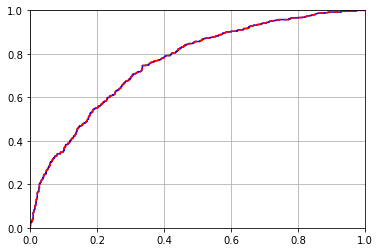

In [13]:
# Строим графики ROC AUC по вычисленным самостоятельно значениям и по значениям, полученным встроенным методом
plt.plot(my_fpr, my_tpr, color='blue')
plt.plot(fpr, tpr, color='red', linestyle='--')
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)

Найденные самостоятельно значения FPR и TPR полностью совпадают со значениями, найденными при использовании встроенной функции.

In [14]:
# Вычисляем Precision и Recall встроенным методом
pr, re, thres = metrics.precision_recall_curve(y_test, predictions[:, 1] )

In [15]:
# Вычисляем самостоятельно Precision и Recall
my_pr = []
my_re = []
for item in np.sort(predictions[:, 1]):
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative    
    for predicted, actual in zip(predictions[:, 1], y_test):
        if predicted >= item:
            new_pred = 1
        else:
            new_pred = 0
        if new_pred == 1:
            if actual ==1:
                tp += 1
            else:
                fp += 1
        else:
            if actual == 1:
                fn += 1
    my_pr.append(tp / (tp + fp))
    my_re.append(tp / (tp + fn))

(0.0, 1.0)

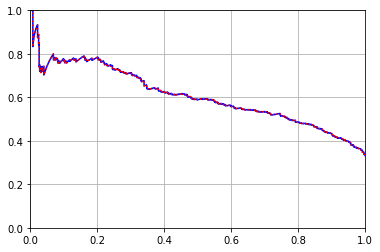

In [16]:
# Строим графики Precision - Recall по вычисленным самостоятельно значениям и по значениям, полученным встроенным методом
plt.plot(my_re, my_pr, color='blue')
plt.plot(re, pr, color='red', linestyle=':')
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)

Построенные графики график Precision - Recall совпадают.